# SDL4Kids.com: All 3 Steps Together - Synthesis-Characterisation-Planning  (MacOS)

This notebook helps you run your first SDL, using the BBC Micro:bit, see [sdl4kids.com](http://sdl4kids.com).

This notebook is part of a 4 part series:
1. Step 1: Synthesis (10 mins, EASY)
2. Step 2: Characterisation (20 mins, MEDIUM)
3. Step 3: Planning (15 mins, MEDIUM)
4. Step 4: All 3 Steps Together - Synthesis-Characterisation-Planning (15 mins, HARD)

This notebook is good for a quick start and runs you through the 3 core steps of an SDL in 15 minutes. 

Step 1, 2 and 3 go into details and are a good place to go this notebook is too hard for you at the moment and does not work for you straight away.

### For the best experience, following along the video-series that explains the notebooks step by step [here](http://sdl4kids.com).

If you have any questions, check out the [FAQ](https://sites.google.com/matterhorn.studio/sdl4kids/faq)!

## Requirements

You will need the following to complete this tutorial:
1. A jupyter notebook and a way to install python packages.
2. A micro:bit, available [here](https://shop.pimoroni.com/products/bbc-micro-bit-go-starter-kit?variant=32337813078099).
3. An enviro:bit (an extension to the micro:bit), available [here](https://kitronik.co.uk/products/46133-envirobit-add-on-for-the-bbc-microbit).

Many parts can be done without the micro:bit, but we recommend it for a real SDL hardware experience.

## Introduction

In this notebook, you will run your first closed-loop SDL.

### *Our Goal*: Finding the optimal RGB mix to match a color on your screen.

Our SDL has three core components:

1. **Synthesis**: We will use your computer screen to *generate rectangles with different RGB colors*.
2. **Characterisation**: We will use the Microbit to *measure the RGB color* on the screen. 
3. **Planning**: We will use different *search strategies to find the correct RGB color* combination.

## (1) Synthesis: Using your screen as an RGB color generator

**Goal**: You will learn how to display different RGB colors on your screen.

RGB stands for 

<span style="color:red">Red (0 to 255)</span>,  
<span style="color:green">Green (0 to 255)</span>,  
<span style="color:blue">Blue (0 to 255)</span> 

By mixing these three colors, we can create all kinds of colors on your screen. 

For example, if you want a fully <span style="color:red">Red</span>, you will need to set the color to (255, 0, 0)

Let's try drawing a red rectangle on our screen. We will use the cv2 package.

In [35]:
import cv2
import numpy as np

In [36]:
red = 255
green = 0
blue = 0

current_color = (red, green, blue)

The following code will open up a red rectangle, for 3 seconds and then close.

**Warning:** The window might open *BEHIND* your jupyter notebook. Make sure to check behind it if you cannot see it pop up.

In [37]:
# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()
image[:, :] = tuple(reversed(current_color)) # cv2 works with BGR order instead of RGB
# Display the image
cv2.imshow("Live Image", image)

cv2.waitKey(3000)  # Adjust the wait time (in milliseconds) as needed
# Close the CV2 window
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

**Task**: Now try it yourself: Change the RGB values above, and see what different rectangles you can create!

**Warning:** The window might open *BEHIND* your jupyter notebook. Make sure to check behind it if you cannot see it pop up.

**Note**: Check out Step 1 for a detailed explanation of this section [here](https://github.com/matterhorn-studio/SDL4Kids.com/tree/main/notebooks/MacOS)

## (2) Characterisation: Measure RGB colors on your screen, using the microbit and envirobit

**Goal**: You will be able to measure RGB colors with the Microbit

We will use the 'pyserial' library to connect to the microbit.

**Steps**: 
1. Program the Microbit to measure RGB color on request.
2. Connect the Microbit to the computer, and make sure we request new measurements from it.

**Note**: Check out Step 2 for a detailed explanation of this section [here](https://github.com/matterhorn-studio/SDL4Kids.com/tree/main/notebooks/MacOS)

### (2.1) Programming the Microbit to send new RGB color measurements

**Task**: We will program the microbit to use its sensor to measure RGB colors, and then send them to our computer.

Slot your Microbit into the Envirobit extension board (see [here](https://shop.pimoroni.com/products/enviro-bit)). Then, plug it into a USB socket on your computer (the microbit LEDs should light up yellow and/or red). 

Then follow these steps:

1. Open MakeCode [here](https://makecode.microbit.org/#editor), in Google Chrome ([download](https://www.google.com/chrome/)).
2. In the middle column, somewhere between "Math" and "Variables" click on "Extensions".
3. Search for "envirobit", then click on it to load the envirobit library into your Microbit program. (it should appear below "Led" as "Enviro:Bit" with a teardrop icon).
4. Drag and drop the below program into your Microbit. 

*Hints*: 

The 'serial' blocks are hidden in the 'Advanced' section. 
The orange 'join' block is in the 'Text' section. 

![Microbit Program](img/microbit_program.png "Microbit Program")

5. Alternatively, you can copy and paste the following code into the "JavaScript" section (switch to JavaScript via its button in the middle of the top bar):
```
serial.onDataReceived(serial.delimiters(Delimiters.Comma), function () {
    serial.writeLine(envirobit.getRed() + "-" + envirobit.getGreen() + "-" + envirobit.getBlue())
    music.playTone(262, music.beat(BeatFraction.Sixteenth))
})
music.setVolume(127)
```

6. Connect to your microbit by clicking 'Connect' on the bottom left. Follow the instructions on the screen.
7. Once connected, press download to load the program onto the microbit.
8. **Alternatively**, follow the standard programming procedure by downloading the program and copying onto the microbit, see [here](https://microbit.org/get-started/first-steps/set-up/#transfer-from-a-computer).


### (2.2) Connecting to the Microbit and request new RGB color measurements

**Warning**: Make 100% sure that you disconnected your Microbit from Google Chrome before continuing. Otherwise, Google Chrome will interfere with the serial connection and you cannot request values

Let's import the 'pyserial' package, which we use to connect to the Microbit (it is just called 'serial'):

In [45]:
import serial

We will list all USB devices currently connected to our computer:

In [46]:
!ls /dev/cu.*

/dev/cu.Bluetooth-Incoming-Port /dev/cu.ZeitlersBoseQC35II
/dev/cu.RoastBeats              /dev/cu.usbmodem1102


Choose the one with 'cu.usbmodem' in its name and copy its name below:

In [47]:
ser = serial.Serial()
ser=serial.Serial("/dev/cu.usbmodem1102",115200, timeout=0.1)

We will introduce a function called 'characterise' that returns the measured RBG color.

In [48]:
def characterise():
    import time
    valid = False
    max_num_tries = 25
    num_tries = 0
    while not valid:
        try:
            ser.flushInput()
            ser.write(b",")
            serial_data = str(ser.readline().decode('utf8')).rstrip()
            print(serial_data)
            rgb = tuple([int(value) for value in serial_data.split("-")])
            # Measurement needs three entries
            if len(rgb) != 3:
                print(f"Measurement did not containt 3 RGB values:{rgb}")
                raise Exception()
            if not np.all([0 <= x <= 255 for x in rgb]):
                print(f"Measurement outside valid range [0,255]:{rgb}")
                raise Exception()
            valid = True
        except Exception as err:
            print(f"Unexpected {err=}, {type(err)=}")
            print("Measurement invalid, will try again")
            if num_tries > max_num_tries:
                print("Please check connection. Maximum number of tries exceeded. There seems to be a fatal error.")
                break
            num_tries = num_tries + 1
    print(f"New RGB Measurement: {rgb}")
    time.sleep(0.4)
    return rgb

Give it a try! Run the following code and hold up the sensor to your computer screen like this: 

![Measuring colors](img/measuring_colors.png "Measuring colors")

In [49]:
for i in range(10):
    characterise()

NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with base 10: 'NaN'"), type(err)=<class 'ValueError'>
Measurement invalid, will try again
NaN-NaN-NaN
Unexpected err=ValueError("invalid literal for int() with 

**Note**: To improve the connection between your computer and the microbit, make sure that Chrome is disconnected as otherwise it will keep sending message to the microbit. Most simply, close the Chrome application. We will not need it again anyway.

## (3) Planning: Using different search strategies: Random, Grid, Bayesian Optimisation

To find the RGB combination that is closest to our goal color, we can use different methods or *"search strategies"* to explore promising RGB combinations. Here, we will take a look at three of them:

1. Random
2. Grid
3. Bayesian Optimisation


**Note**: Check out Step 3 for a detailed explanation of this section [here](https://github.com/matterhorn-studio/SDL4Kids.com/tree/main/notebooks/MacOS)

### (3.1) Strategy: Random

**Goal**: You will learn how to use a random search to find the best RGB combination.

*Random* here means the same as throwing a die with 6 sides: Each side, 1 to 6, has an equal probability (1/6 = 16.6%) of occurence. 

With RGB colors, we essentially have three dice — one for each R, G and B — with each die having 256 sides, representing the numbers 0 to 255. Each side has equal probability.

We will throw these three die to select the next RGB experiment. If we do that 100 times, many RGB colors will be far off our target color, but with a certain probability, some will get close.

**Note**: Hold up your envirobit color sensor closely to the screen where the rectangle appears to measure the colors.

In [50]:
import random
import numpy as np
import cv2

# Function to generate random color
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

# Function to calculate the error between two colors
def calculate_error(color1, color2):
    return np.sqrt((color1[0] - color2[0]) ** 2 + (color1[1] - color2[1]) ** 2 + (color1[2] - color2[2]) ** 2)

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (255, 0, 0)  # Red color (BGR format)

# Create an empty list to store the error values
error_values = []

# Main loop
max_iterations = 10  # Set the desired number of iterations

candidate_color = (0,0,0) # Initial candidate

for iteration in range(max_iterations):
    

    # STEP 1: Synthesis
    # Update the live image with the current color
    image[:, :] = tuple(reversed(candidate_color))
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color
    rgb_measurement = characterise()
    
    # STEP 3: Planning
    
    # Calculate the error between the goal color and the current color
    error = calculate_error(goal_color, rgb_measurement)

    # Add the error value to the list
    error_values.append(error)    

    # Add text information to the image
    text = f"Iteration: {iteration + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), tuple(reversed(goal_color)), -1)

    # Add text for the error
    error_text = f"Error: {error:.2f}"
    cv2.putText(image, error_text, (10, height - 10), font, font_scale, font_color, 2)

    # Draw the graph of error values
    if len(error_values) > 1:
        for i in range(1, len(error_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(error_values[i - 1] * (height - 60) / max(error_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(error_values[i] * (height - 60) / max(error_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(1)  # Adjust the wait time (in milliseconds) as needed

    
    # Generate a new candidate color, for now we will pick one randomly
    candidate_color = generate_random_color()
    
# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

50-95-107
New RGB Measurement: (50, 95, 107)
50-95-107
New RGB Measurement: (50, 95, 107)
52-95-105
New RGB Measurement: (52, 95, 105)
125-68-65
New RGB Measurement: (125, 68, 65)
153-54-54
New RGB Measurement: (153, 54, 54)
97-60-98
New RGB Measurement: (97, 60, 98)
89-74-90
New RGB Measurement: (89, 74, 90)
89-74-90
New RGB Measurement: (89, 74, 90)
94-88-71
New RGB Measurement: (94, 88, 71)
71-84-96
New RGB Measurement: (71, 84, 96)


-1

We can now plot the errors for each iteration:

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error_values)

Let's also add some more detail to the plot, so it is easier to read and interpret:

In [ ]:
import matplotlib.pyplot as plt
# Plot error for each iteration
plt.scatter(range(len(error_values)), error_values, label="Error for each iteration")

# Calculate best error so far
best_error_so_far = 1000
best_errors = []
for value in error_values:
    if value < best_error_so_far:
        best_error_so_far = value
    best_errors.append(best_error_so_far)
    
# Plot best error so far
plt.plot(best_errors, label="Best Error So Far", color="orange")
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Distance to Goal', fontsize=18)
plt.legend()

**Task**: What happens when you run the loop for longer? Do you find more colors that have a small error?

### (3.2) Use a search over a grid to find the best RGB combination

**Goal**: We will generate a 'grid' of RGB combinations, which we then measure and pick the best point.

Image you want to cook the best pizza, but you don't know for how long you should put the pizza in the oven (e.g. at 200 Celsius). It is most likely somehwere between 10 and 15 minutes. If we have 6 pizzas, we can just put in a pizza for each 10, 11, 12, 13, 14 and 15 minutes and then test the taste. 

That's a grid: We have a lower (10) and upper (15) bound and a limited number of experiments we can run in between (6 pizzas). If we evenly space them, we get the following grid: 10, 11, 12, 13, 14, 15.

For our SDL4Kids, we have 3 variables R, G and B instead of 'minutes in the oven'. For example, we can create a grid with 3 steps for each variable. That would be 3 * 3 * 3 = 27 experiments to run. The following code generates such a grid:

In [44]:
grid_steps = 3
red = np.linspace(0, 255, grid_steps)
green = np.linspace(0, 255, grid_steps)
blue = np.linspace(0, 255, grid_steps)

grid_combinations = []
for r in red:
    for g in green:
        for b in blue:
            combination = (r,g,b)
            grid_combinations.append(combination)
grid_combinations

[(0.0, 0.0, 0.0),
 (0.0, 0.0, 127.5),
 (0.0, 0.0, 255.0),
 (0.0, 127.5, 0.0),
 (0.0, 127.5, 127.5),
 (0.0, 127.5, 255.0),
 (0.0, 255.0, 0.0),
 (0.0, 255.0, 127.5),
 (0.0, 255.0, 255.0),
 (127.5, 0.0, 0.0),
 (127.5, 0.0, 127.5),
 (127.5, 0.0, 255.0),
 (127.5, 127.5, 0.0),
 (127.5, 127.5, 127.5),
 (127.5, 127.5, 255.0),
 (127.5, 255.0, 0.0),
 (127.5, 255.0, 127.5),
 (127.5, 255.0, 255.0),
 (255.0, 0.0, 0.0),
 (255.0, 0.0, 127.5),
 (255.0, 0.0, 255.0),
 (255.0, 127.5, 0.0),
 (255.0, 127.5, 127.5),
 (255.0, 127.5, 255.0),
 (255.0, 255.0, 0.0),
 (255.0, 255.0, 127.5),
 (255.0, 255.0, 255.0)]

In [ ]:
import random
import numpy as np
import cv2

# Function to generate random color
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

# Function to calculate the error between two colors
def calculate_error(color1, color2):
    return np.sqrt((color1[0] - color2[0]) ** 2 + (color1[1] - color2[1]) ** 2 + (color1[2] - color2[2]) ** 2)

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (255, 0, 0)  # Red color (BGR format)

# Create an empty list to store the error values
error_values = []

# Main loop
max_iterations = len(grid_combinations)  # Set the desired number of iterations

candidate_color = grid_combinations[0]

for iteration, grid_combination in enumerate(grid_combinations):
    

    # STEP 1: Synthesis
    # Update the live image with the current color
    image[:, :] = tuple(reversed(candidate_color))
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color
    rgb_measurement = characterise()
    
    # STEP 3: Planning
    
    # Calculate the error between the goal color and the current color
    error = calculate_error(goal_color, rgb_measurement)

    # Add the error value to the list
    error_values.append(error)    

    # Add text information to the image
    text = f"Iteration: {iteration + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), tuple(reversed(goal_color)), -1)

    # Add text for the error
    error_text = f"Error: {error:.2f}"
    cv2.putText(image, error_text, (10, height - 10), font, font_scale, font_color, 2)

    # Draw the graph of error values
    if len(error_values) > 1:
        for i in range(1, len(error_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(error_values[i - 1] * (height - 60) / max(error_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(error_values[i] * (height - 60) / max(error_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(100)  # Adjust the wait time (in milliseconds) as needed
    
    # Generate a new candidate color, for now we will pick one randomly
    candidate_color = grid_combination
    
# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
import matplotlib.pyplot as plt
# Plot error for each iteration
plt.scatter(range(len(error_values)), error_values, label="Error for each iteration")

# Calculate best error so far
best_error_so_far = 1000
best_errors = []
for value in error_values:
    if value < best_error_so_far:
        best_error_so_far = value
    best_errors.append(best_error_so_far)
    
# Plot best error so far
plt.plot(best_errors, label="Best Error So Far", color="orange")
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Distance to Goal', fontsize=18)
plt.legend()

**Task**: What happens when you increase the size of the grid?

Increase *grid_steps* and see what happens. Do you find a combination with a lower error?

### (3.3) Strategy: Bayesian Optimisation

**Goal**: With **Bayesian Optimisation**, we build a statistical model for decision making, i.e. using statistics to steer our search. 

We can ask this model for the next *most informative* combination to test, collect the data, update the model and repeat.

In [52]:
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.utils import standardize
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from botorch.models.transforms.input import Normalize
from botorch.models.transforms.outcome import Standardize

/opt/homebrew/Caskroom/miniforge/base/envs/SDL4Kids/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
import pandas as pd
def calculate_candidate(samples):
    train_X = samples[["R","G","B"]]
    train_Y = samples[["error"]]

    train_X = torch.tensor(train_X.to_numpy(dtype=np.float64))
    train_Y = torch.tensor(-1*train_Y.to_numpy(dtype=np.float64))

    gp = SingleTaskGP(train_X, train_Y, input_transform=Normalize(d=train_X.shape[-1]), outcome_transform=Standardize(m=train_Y.shape[-1]),)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)

    from botorch.acquisition import UpperConfidenceBound
    UCB = UpperConfidenceBound(gp, beta=0.1)
    
    from botorch.optim import optimize_acqf
    bounds = torch.stack([torch.zeros(3), torch.ones(3)*255])
    candidate, acq_value = optimize_acqf(
        UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
    )
    candidate = candidate[0]
    candidate = {"R": candidate[0], "G": candidate[1], "B": candidate[2]}
    return candidate

In [54]:
import random
import numpy as np
import cv2

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (255,0,0) 

# Main loop
max_iterations = 50  # Set the desired number of iterations

# Let us set up a data table to record the data more structured
samples = pd.DataFrame(columns=['R', 'G', 'B', 'error', 'ID'])

candidate_color = (0,0,0) # Initial color

for iteration in range(max_iterations):
    print(f"---Iteration {iteration}")

    # STEP 1: Synthesis
    # Update the live image with the current color
    print(f"Synthesis:{candidate_color}")
    image[:, :] = tuple(reversed(candidate_color))
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color by just plugging it in
    rgb_measurement = characterise()
    print(f"Characterisation:{rgb_measurement}")
    
    # STEP 3: Planning
    # Calculate the loss between the goal color and the current color
    error = calculate_error(goal_color, rgb_measurement)
    print(f"Error:{error}")

    # Add the sample to the data table
    new_sample = pd.DataFrame({"R":rgb_measurement[0], "G":rgb_measurement[1], "B":rgb_measurement[2], "ID":iteration, "error":error}, index=[iteration])
    samples = pd.concat([samples, new_sample], axis=0, ignore_index=True)

    candidate = calculate_candidate(samples)
    candidate_color = (candidate['R'].item(), candidate['G'].item(), candidate['B'].item())
    print(f"Planning: Candidate:{candidate_color}")
    
    # Add text information to the image
    text = f"Iteration: {iteration + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = 50
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), tuple(reversed(goal_color)), -1)

    # Add text for the error
    error_text = f"Error: {error:.2f}"
    cv2.putText(image, error_text, (10, height - 10), font, font_scale, font_color, 2)

    error_values = list(samples['error'].to_numpy())    # Draw the graph of error values
    if len(error_values) > 1:
        for i in range(1, len(error_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(error_values[i - 1] * (height - 60) / max(error_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(error_values[i] * (height - 60) / max(error_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(200)  # Adjust the wait time (in milliseconds) as needed
    
# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

---Iteration 0
Synthesis:(0, 0, 0)
48-95-109
New RGB Measurement: (48, 95, 109)
Characterisation:(48, 95, 109)
Error:252.49752474034275
Planning: Candidate:(14.30493450164795, 34.41313171386719, 250.2232666015625)
---Iteration 1
Synthesis:(14.30493450164795, 34.41313171386719, 250.2232666015625)
48-95-107
New RGB Measurement: (48, 95, 107)
Characterisation:(48, 95, 107)
Error:251.64061675333733
Planning: Candidate:(88.28305053710938, 179.75625610351562, 172.2974853515625)
---Iteration 2
Synthesis:(88.28305053710938, 179.75625610351562, 172.2974853515625)
65-93-93
New RGB Measurement: (65, 93, 93)
Characterisation:(65, 93, 93)
Error:231.08007270208307
Planning: Candidate:(101.43893432617188, 96.71282196044922, 101.36660766601562)
---Iteration 3
Synthesis:(101.43893432617188, 96.71282196044922, 101.36660766601562)
24-68-156
New RGB Measurement: (24, 68, 156)
Characterisation:(24, 68, 156)
Error:286.9163641202781
Planning: Candidate:(65.41700744628906, 93.15673828125, 86.48505401611328)
-

---Iteration 36
Synthesis:(255.0, 0.0, 0.0)
210-28-29
New RGB Measurement: (210, 28, 29)
Characterisation:(210, 28, 29)
Error:60.41522986797286
Planning: Candidate:(255.0, 0.016448967158794403, 0.0)
---Iteration 37
Synthesis:(255.0, 0.016448967158794403, 0.0)
210-28-29
New RGB Measurement: (210, 28, 29)
Characterisation:(210, 28, 29)
Error:60.41522986797286
Planning: Candidate:(255.0, 0.0, 0.0)
---Iteration 38
Synthesis:(255.0, 0.0, 0.0)
210-28-29
New RGB Measurement: (210, 28, 29)
Characterisation:(210, 28, 29)
Error:60.41522986797286
Planning: Candidate:(255.0, 0.0, 0.0)
---Iteration 39
Synthesis:(255.0, 0.0, 0.0)
210-28-29
New RGB Measurement: (210, 28, 29)
Characterisation:(210, 28, 29)
Error:60.41522986797286
Planning: Candidate:(255.0, 0.023286225274205208, 0.0)
---Iteration 40
Synthesis:(255.0, 0.023286225274205208, 0.0)
210-28-29
New RGB Measurement: (210, 28, 29)
Characterisation:(210, 28, 29)
Error:60.41522986797286
Planning: Candidate:(255.0, 0.0, 0.0)
---Iteration 41
Synthe

-1

Let's plot the errors for the Bayesian Optimisation. Do you see the difference to a random or grid search?

In [ ]:
import matplotlib.pyplot as plt
# Plot error for each iteration
plt.scatter(range(len(error_values)), error_values, label="Error for each iteration")

# Calculate best error so far
best_error_so_far = 1000
best_errors = []
for value in error_values:
    if value < best_error_so_far:
        best_error_so_far = value
    best_errors.append(best_error_so_far)
    
# Plot best error so far
plt.plot(best_errors, label="Best Error So Far", color="orange")
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Distance to Goal', fontsize=18)
plt.legend()

We can also add the RGB colors into the plot to understand better how the Bayesian Optimisation algorithm is making its decisions:

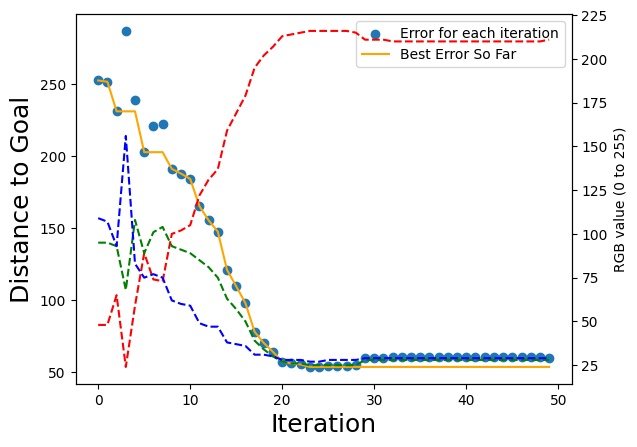

In [55]:
import matplotlib.pyplot as plt
# Plot error for each iteration
plt.scatter(range(len(error_values)), error_values, label="Error for each iteration")

# Calculate best error so far
best_error_so_far = 1000
best_errors = []
for value in error_values:
    if value < best_error_so_far:
        best_error_so_far = value
    best_errors.append(best_error_so_far)
    
# Plot best error so far
plt.plot(best_errors, label="Best Error So Far", color="orange")
plt.xlabel('Iteration', fontsize=18)
plt.ylabel('Distance to Goal', fontsize=18)
plt.legend()
ax = plt.gca()
secax = ax.twinx() 
secax.set_ylabel('RGB value (0 to 255)')
secax.plot(samples['R'], color='red', linestyle='dashed')
secax.plot(samples['G'], color='green', linestyle='dashed')
secax.plot(samples['B'], color='blue', linestyle='dashed')


**How to interpret the results**:

Our goal was to create a red color on the screen. So presumably the color will need to have a lot of red in it!

As you can see in the plot above, at first, the algorithm is mixing all three RGB colors, but soon realises that it only needs red, and not much of green or blue.

Therefore, it increases red to a maximum and reduces green and blue to a minimum!

*Note: Depending on the light in your room, and sunlight from outside, the algorithm will not converge onto a solution of (255,0,0). This is by design! It is robust to the noise in the color sensor and adjusts accordingly to still ultimately produce the color on the screen closest to the goal!*

## (4) Congratulations! 

### You just ran your first closed-loop self-driving laboratory. You learned how to do its 3 core steps:
### 1. Synthesis: *Generating the material: a color on your screen (RGB)*
### 2. Charactersiation: *Measuring the material: the color on your screen (in RGB)*
### 3. Planning: *Choosing the next experiment: randomly, with a grid or with Bayesian Optimisation*

### Next Steps: We have prepared notebooks that discuss each step in detail, see [sdl4kids.com](http://sdl4kids.com)